# Analyse des données "Volume de Vente des pièces de rechange"
Source des données : https://raw.githubusercontent.com/sami-sifi/DATA-16-17/master/Volume%20des%20ventes%20de%20pièces%20de%20rechange%20en%20MD%20au%20USA/volume%20des%20ventes.txt

Start date : Janvier 1992  
Frequency : 12

## Imporation des données / transformation en ST

In [2]:
PR<-read.table("volume_des_ventes.txt",header=F)

PR.ts<-ts(PR,start=c(1992,1),freq=12)

## Plot de la ST

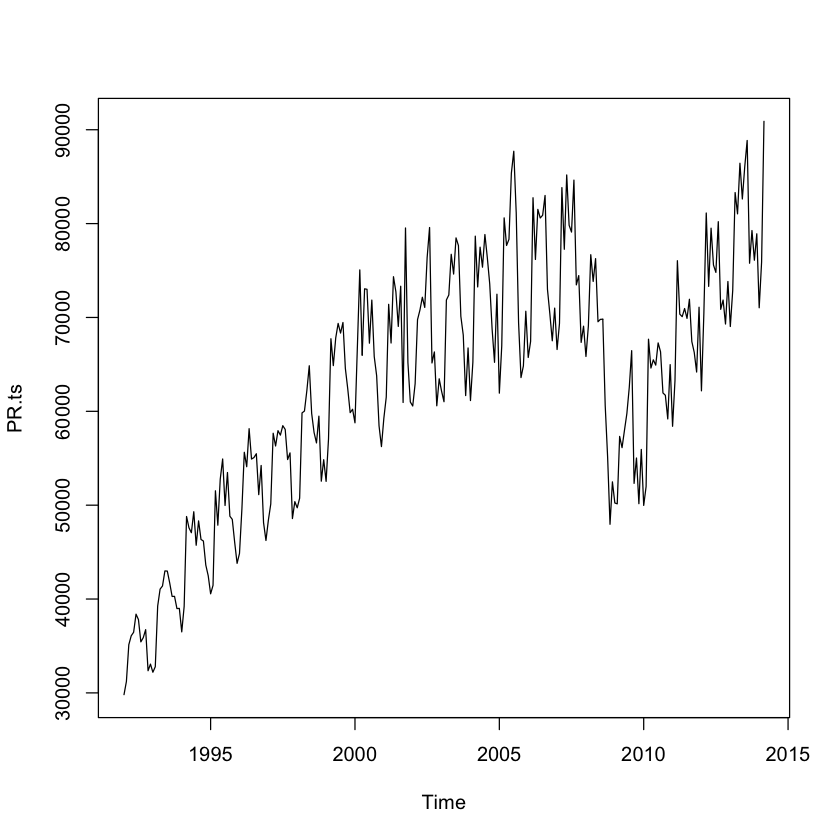

In [3]:
ts.plot(PR.ts)

## Détection des points de ruptures via la library(strucchange)
### Installation / importation du package

In [4]:
#install.packages("strucchange") pour l'installation du package
library(strucchange)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


### création du vecteur d'indices entiers

In [5]:
n<-length(PR.ts)
t<-c(1:n)

### Détermination des points de ruptures
Il faut choisir quel modèle est à utiliser : polynome d'ordre 1 - 2 ou autre. Dans cet example, on considèrera un polynome d'ordre 1.

In [6]:
bp<-breakpoints(PR.ts~t)
bp
summary(bp)


	 Optimal 3-segment partition: 

Call:
breakpoints.formula(formula = PR.ts ~ t)

Breakpoints at observation number:
86 200 

Corresponding to breakdates:
1999(2) 2008(8) 


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = PR.ts ~ t)

Breakpoints at observation number:
                         
m = 1                 200
m = 2      86         200
m = 3      86     158 200
m = 4   40 86     158 200
m = 5   40 80 120 160 200

Corresponding to breakdates:
                                                
m = 1                                    2008(8)
m = 2           1999(2)                  2008(8)
m = 3           1999(2)          2005(2) 2008(8)
m = 4   1995(4) 1999(2)          2005(2) 2008(8)
m = 5   1995(4) 1998(8) 2001(12) 2005(4) 2008(8)

Fit:
                                                               
m   0         1         2         3         4         5        
RSS 2.264e+10 1.006e+10 7.740e+09 7.409e+09 7.241e+09 7.601e+09
BIC 5.649e+03 5.449e+03 5.396e+03 5.401e+03 5.411e+03 5.441e+03

### Plot du fit

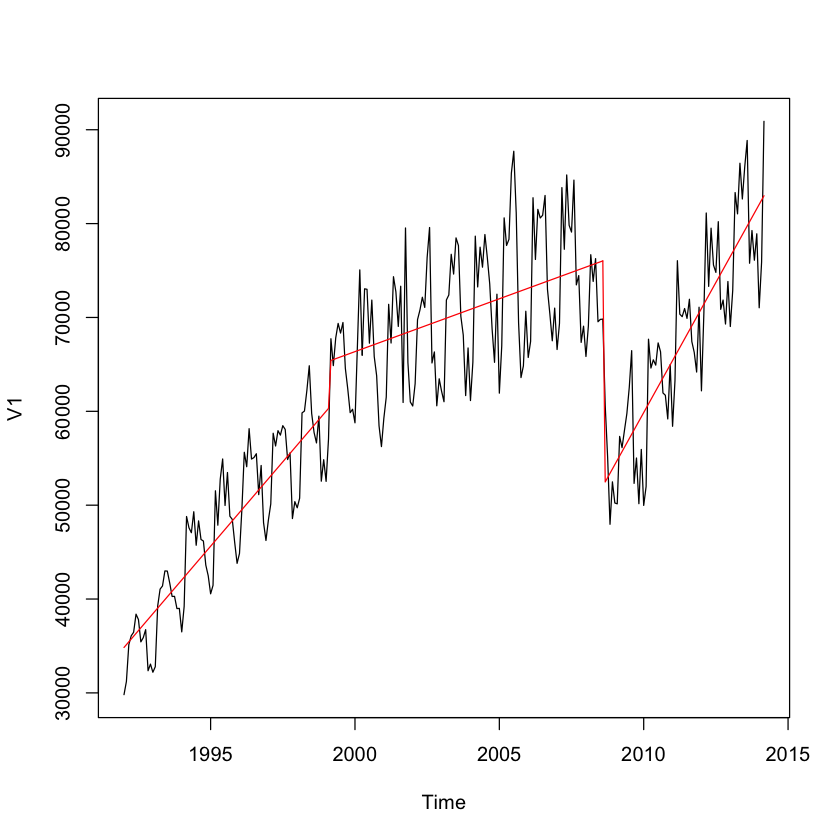

In [7]:
plot(PR.ts)
points(time(PR.ts),fitted(bp),col=2,type="l")

***Remarque:*** On essaye le modèle polynomial d'ordre 2 pour voir la différence


	 Optimal 2-segment partition: 

Call:
breakpoints.formula(formula = PR.ts ~ t + I(t^2))

Breakpoints at observation number:
200 

Corresponding to breakdates:
2008(8) 

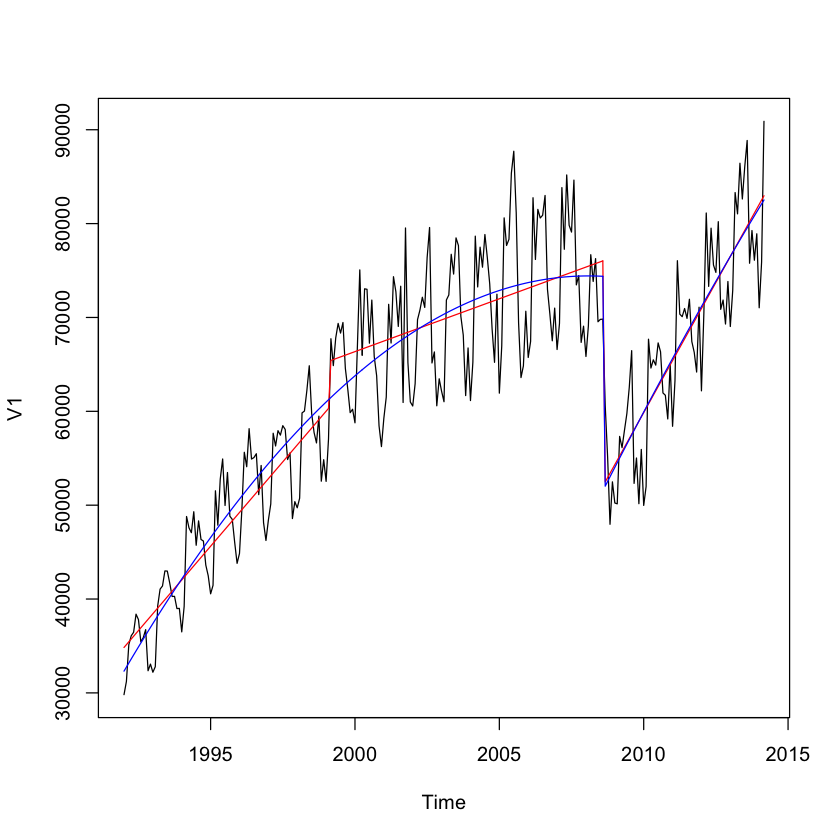

In [10]:
bp2<-breakpoints(PR.ts~t+I(t^2))
bp2
plot(PR.ts)
points(time(PR.ts),fitted(bp),col=2,type="l")
points(time(PR.ts),fitted(bp2),col="blue",type="l")

In [11]:
BIC(bp)
BIC(bp2)

[1] 5395.72

[1] 5391.683

### Utilisation de la fonction lm en utilisant les variables dummy


Call:
lm(formula = PR.ts ~ t + t * VD1 + t * VD2)

Coefficients:
(Intercept)            t          VD1          VD2        t:VD1        t:VD2  
    34540.6        299.7      22719.1     -74939.3       -205.8        162.4  


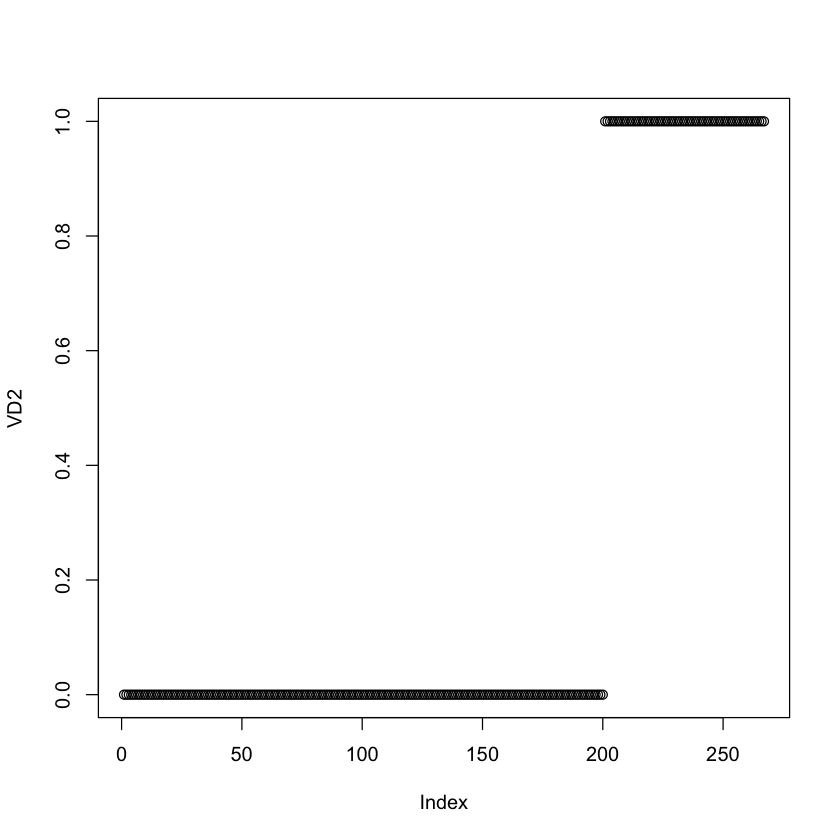

In [13]:
t1=bp$breakpoints[1]
t2=bp$breakpoints[2]
VD1=ifelse(t>t1 & t<=t2,1,0)
VD2=ifelse(t>t2,1,0)

plot(VD2)

Model.lm<-lm(PR.ts~t+t*VD1+t*VD2)
Model.lm

### Comparaison des résultats

[1] 5395.72

[1] 5384.545

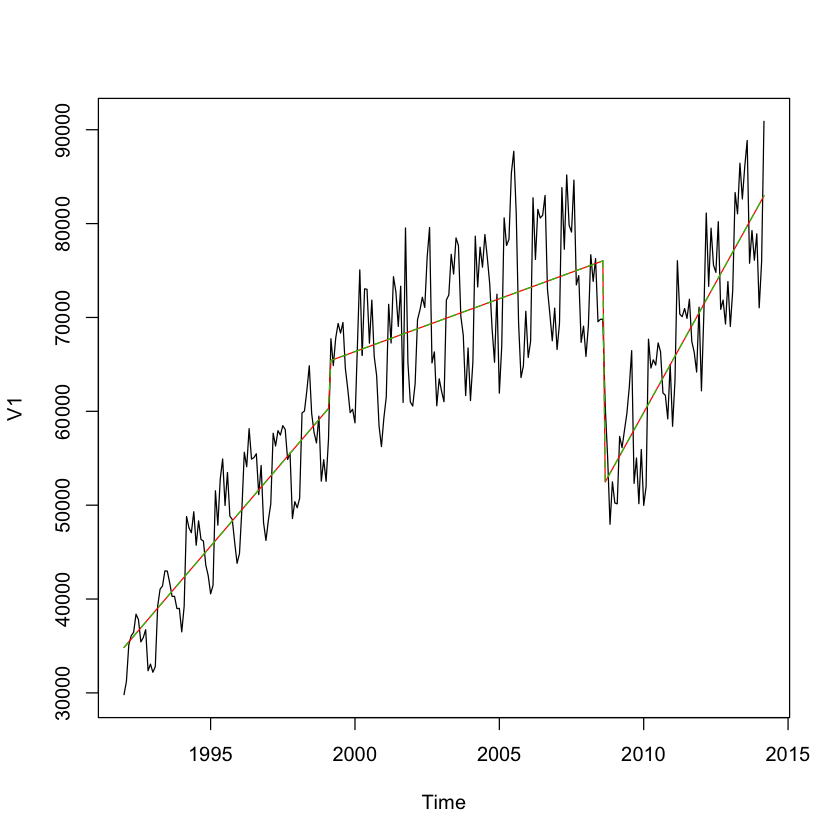

In [14]:
plot(PR.ts)
points(time(PR.ts),fitted(bp),col=2,type="l")
points(time(PR.ts),fitted(Model.lm),col=3,type="l",lty=2)

BIC(bp)
BIC(Model.lm)

### Modélisation de la composante saisonnière 

1. par les fonctions cosinus et sinus  
2. par les variables dummy

In [15]:
# COS & SIN
T=12
COS=matrix(0,n,6)
SIN=matrix(0,n,5)
for (i in 1:6){COS[,i]=cos(2*pi*i*t/T)}
for (i in 1:5){SIN[,i]=sin(2*pi*i*t/T)}

Model.lm.s<-lm(PR.ts~t+t*VD1+t*VD2+COS+SIN)

[1] 5395.72

[1] 5384.545

[1] 5127.831

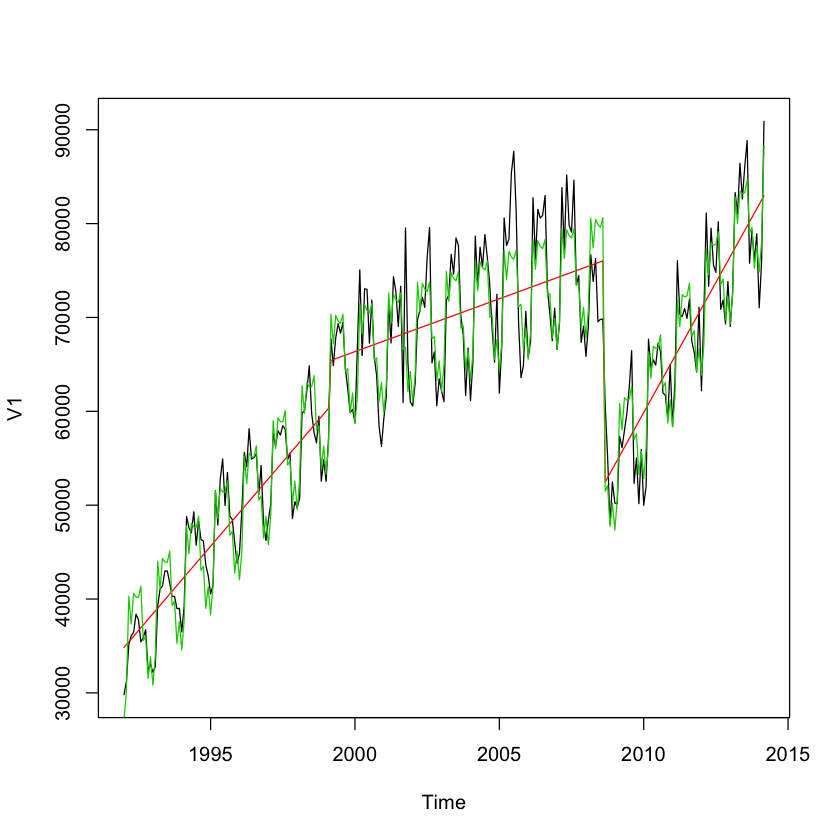

In [16]:
plot(PR.ts)
points(time(PR.ts),fitted(Model.lm),col=2,type="l")
points(time(PR.ts),fitted(Model.lm.s),col=3,type="l")
BIC(bp)
BIC(Model.lm)
BIC(Model.lm.s)

### Utilisation des données logarithmiques : transformation logarithmique

In [17]:
bp.log<-breakpoints(log(PR.ts)~t)
bp.log
summary(bp.log)


	 Optimal 4-segment partition: 

Call:
breakpoints.formula(formula = log(PR.ts) ~ t)

Breakpoints at observation number:
44 86 200 

Corresponding to breakdates:
1995(8) 1999(2) 2008(8) 


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = log(PR.ts) ~ t)

Breakpoints at observation number:
                         
m = 1                 200
m = 2         104     200
m = 3   44 86         200
m = 4   44 86     158 200
m = 5   40 80 120 160 200

Corresponding to breakdates:
                                                
m = 1                                    2008(8)
m = 2                   2000(8)          2008(8)
m = 3   1995(8) 1999(2)                  2008(8)
m = 4   1995(8) 1999(2)          2005(2) 2008(8)
m = 5   1995(4) 1998(8) 2001(12) 2005(4) 2008(8)

Fit:
                                                         
m   0        1        2        3        4        5       
RSS    6.843    3.208    2.009    1.870    1.812    1.903
BIC -203.805 -389.314 -497.509 -499.902 -491.617 -461.649

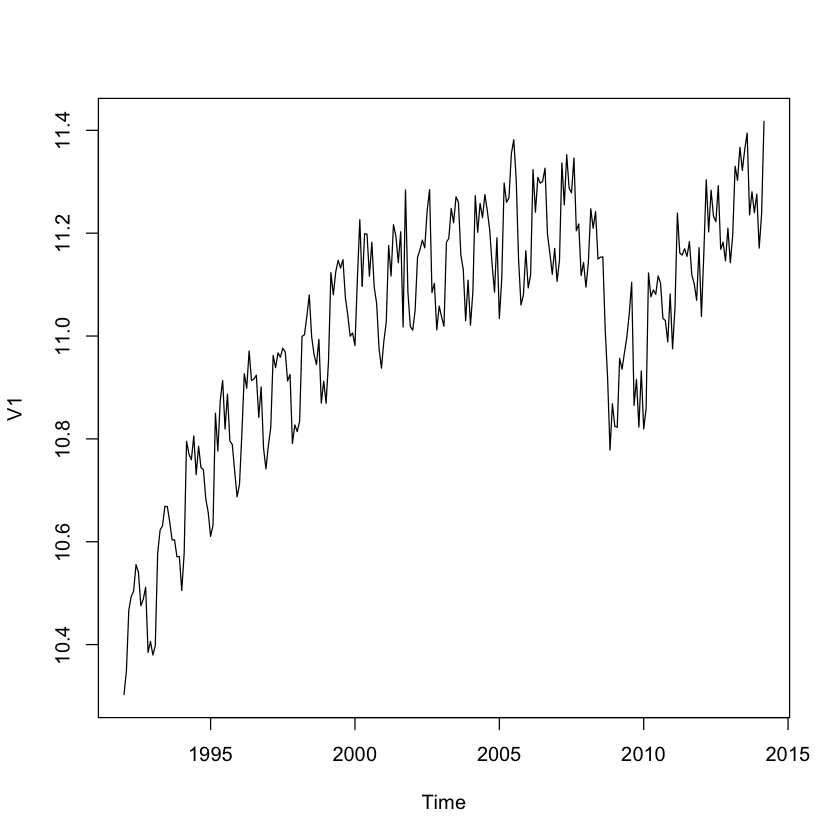

In [18]:
plot(log(PR.ts))

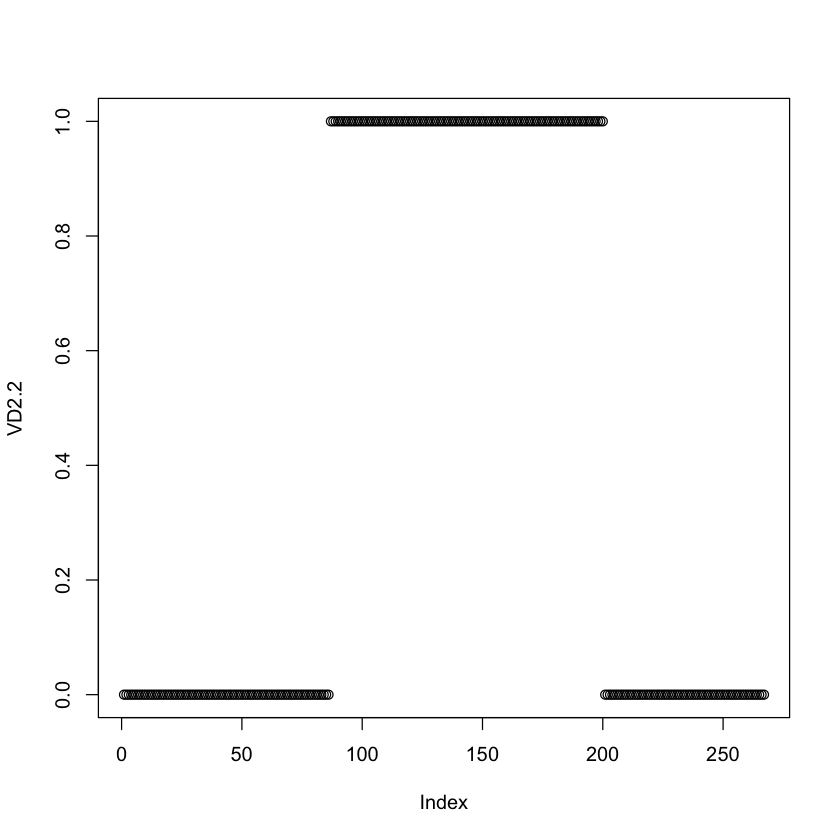

In [25]:
r1=bp.log$breakpoints[1]
r2=bp.log$breakpoints[2]
r3=bp.log$breakpoints[3]

VD1.2=ifelse(t>r1 & t<=r2,1,0)
VD2.2=ifelse(t>r2 & t<=r3,1,0)
VD3.2=ifelse(t>r3,1,0)
plot(VD2.2)

Model.lm.s.log<-lm(log(PR.ts)~t+t*VD1.2+t*VD2.2+t*VD3.2+COS+SIN)

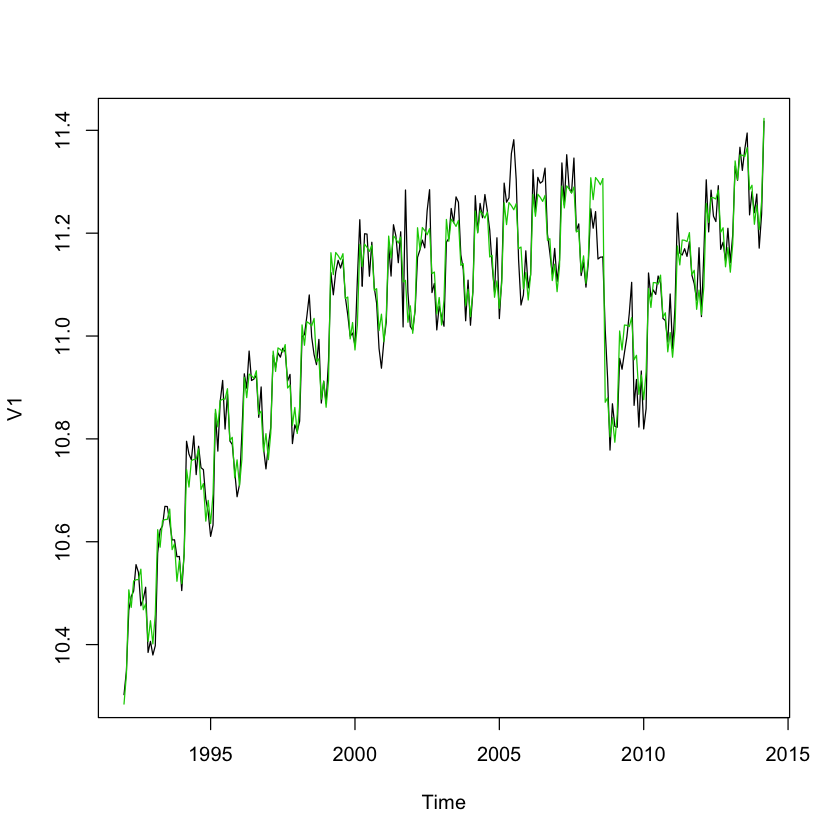

In [26]:
plot(log(PR.ts))
points(time(PR.ts),fitted(Model.lm.s.log),col=3,type="l")

In [28]:
BIC(Model.lm.s)
BIC(Model.lm.s.log)

[1] 5127.831

[1] -825.9829

In [32]:
# Variable dummy

VD<-function(N,k,T) #N: nombre de période / k: indice / T: période
{y<-rep(0,T*N)
for (i in 0:(N-1)){y[k+i*T]<-1}
return(y)
}

#plot(VD(3,3,12))
# Dans notre cas, on a n/T=22.25 périodes donc on prend N=23
N=floor(n/T)+1

MVD<-matrix(0,N*T,T)
for(i in 1:T) MVD[,i]<-VD(N,i,T)
dim(MVD)

MVD<-MVD[1:(n),]
dim(MVD)

[1] 276  12

[1] 267  12

In [31]:
n/T

[1] 22.25

In [33]:
Model.lm.s.log.2<-lm(log(PR.ts)~t+t*VD1.2+t*VD2.2+t*VD3.2+MVD)

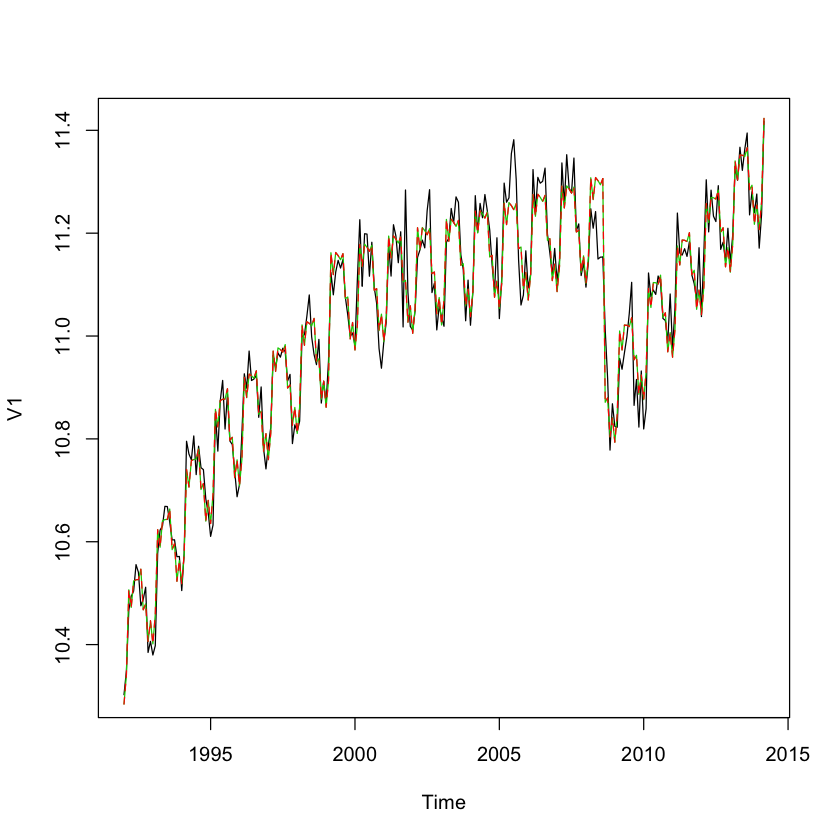

In [36]:
plot(log(PR.ts))
points(time(PR.ts),fitted(Model.lm.s.log),col=3,type="l")
points(time(PR.ts),fitted(Model.lm.s.log.2),col=2,type="l",lty=2)

In [37]:
summary(Model.lm.s.log)
summary(Model.lm.s.log.2)


Call:
lm(formula = log(PR.ts) ~ t + t * VD1.2 + t * VD2.2 + t * VD3.2 + 
    COS + SIN)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.152426 -0.023907  0.001222  0.021504  0.175690 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.3972191  0.0133285 780.073  < 2e-16 ***
t            0.0097484  0.0005160  18.892  < 2e-16 ***
VD1.2        0.2260858  0.0391706   5.772 2.33e-08 ***
VD2.2        0.5672988  0.0225423  25.166  < 2e-16 ***
VD3.2       -0.8934230  0.0657705 -13.584  < 2e-16 ***
COS1        -0.0914690  0.0037744 -24.234  < 2e-16 ***
COS2        -0.0182802  0.0037564  -4.866 2.02e-06 ***
COS3         0.0100244  0.0037624   2.664  0.00822 ** 
COS4         0.0163194  0.0037558   4.345 2.03e-05 ***
COS5         0.0123783  0.0037611   3.291  0.00114 ** 
COS6         0.0032506  0.0026553   1.224  0.22205    
SIN1         0.0018955  0.0037524   0.505  0.61390    
SIN2        -0.0094217  0.0037607  -2.505  0.01288 *  
SIN3        


Call:
lm(formula = log(PR.ts) ~ t + t * VD1.2 + t * VD2.2 + t * VD3.2 + 
    MVD)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.152426 -0.023907  0.001222  0.021504  0.175690 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.3294426  0.0161553 639.384  < 2e-16 ***
t            0.0097484  0.0005160  18.892  < 2e-16 ***
VD1.2        0.2260858  0.0391706   5.772 2.33e-08 ***
VD2.2        0.5672988  0.0225423  25.166  < 2e-16 ***
VD3.2       -0.8934230  0.0657705 -13.584  < 2e-16 ***
MVD1        -0.0548297  0.0129427  -4.236 3.21e-05 ***
MVD2        -0.0073611  0.0129421  -0.569 0.570024    
MVD3         0.1477791  0.0129471  11.414  < 2e-16 ***
MVD4         0.1039323  0.0130889   7.941 7.00e-14 ***
MVD5         0.1455229  0.0130866  11.120  < 2e-16 ***
MVD6         0.1381325  0.0130860  10.556  < 2e-16 ***
MVD7         0.1287982  0.0130870   9.842  < 2e-16 ***
MVD8         0.1392222  0.013089

## Modélisation ARMA des résidus 

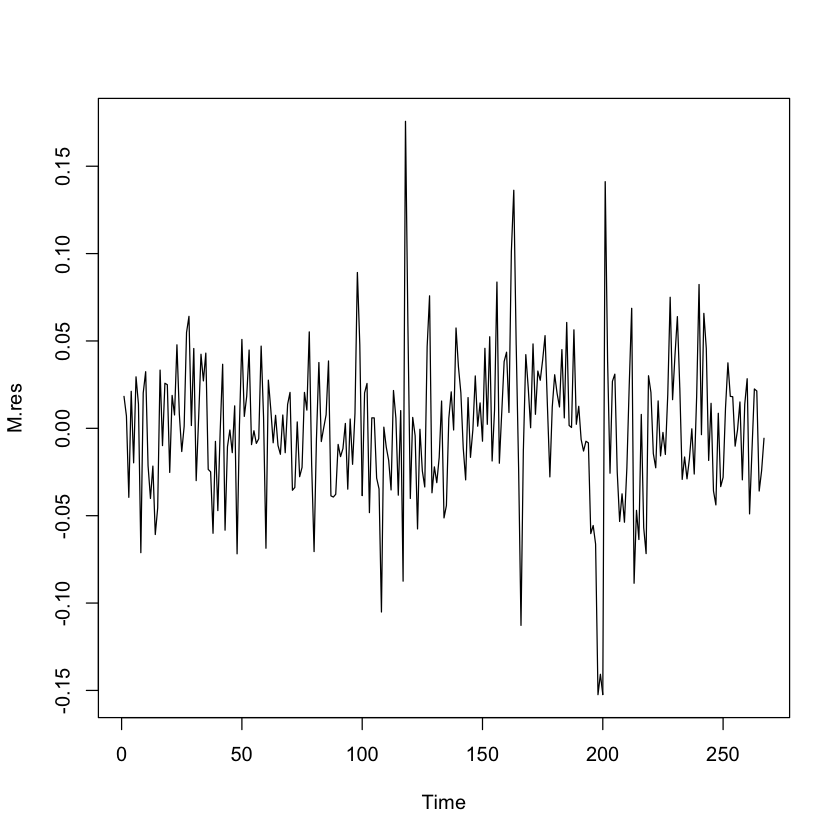

In [38]:
M=Model.lm.s.log.2
M.res<-residuals(M)
ts.plot(M.res)

In [39]:
#install.packages("tseries")
library(tseries)

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [40]:
adf.test(M.res)

Warning message in adf.test(M.res):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  M.res
Dickey-Fuller = -5.9252, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


In [23]:
Box.test(M.res)


	Box-Pierce test

data:  M.res
X-squared = 17.342, df = 1, p-value = 3.121e-05


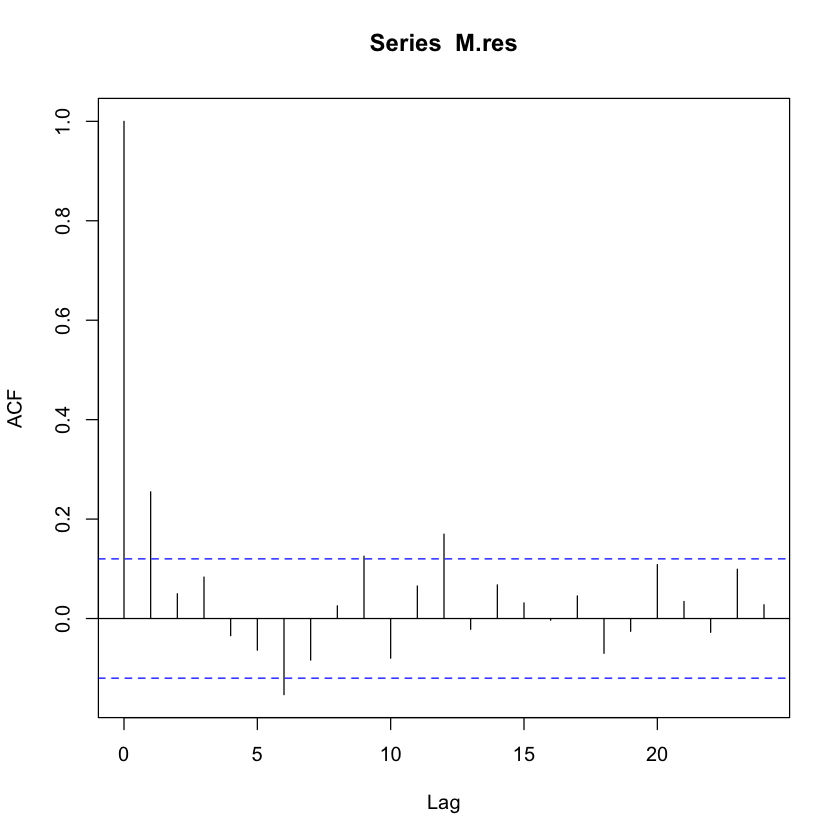

In [24]:
acf(M.res)

In [26]:
#install.packages("forecast")
#library(forecast)
#library(ggplot2)
library(forecast)

ERROR: Error: package or namespace load failed for ‘forecast’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called ‘ggplot2’


In [ ]:
auto.arima(M.res)